In [17]:
import pandas as pd
cereal = pd.read_csv("cereal.csv")
print(cereal.shape)

(77, 16)


In [20]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
X=cereal[['fiber','sugars','fat','protein']]
X=pd.DataFrame(X)
#X_standardized=preprocessing.scale(X)
X_standardized=X
#X_standardized=pd.DataFrame(X_standardized)
#X_standardized.describe()

Text(0, 0.5, 'Inertia')

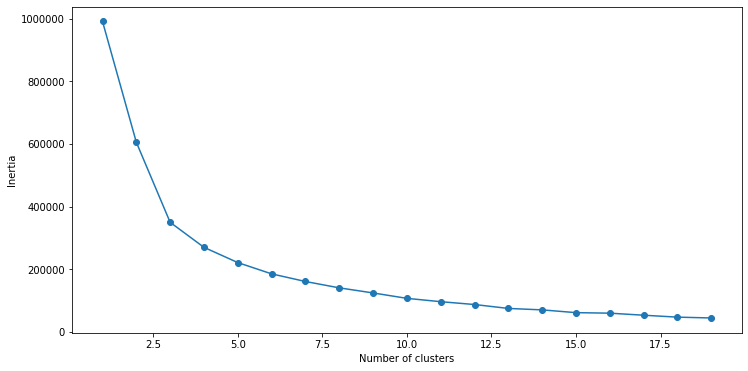

In [21]:
import matplotlib.pyplot as plt
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_standardized)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [10]:
kmeans_model = KMeans(n_clusters=3, init='k-means++').fit(X_standardized)
kmeans_model.inertia_

704.5514285714287

In [11]:
y_kmeans=kmeans_model.predict(X_standardized)
cluster = pd.DataFrame(y_kmeans)
X['cluster']=cluster
X['cluster'].value_counts()
#print(X.loc[X['cluster'].isin([4])])

1    39
0    35
2     3
Name: cluster, dtype: int64

In [12]:
kmeans_mean_cluster = pd.DataFrame(round(X.groupby('cluster').mean(),1))
kmeans_mean_cluster

,fiber,sugars,fat,protein
cluster,,,,
0,1.6,11.1,1.4,2.1
1,1.9,3.4,0.7,2.8
2,11.0,3.7,0.7,4.0


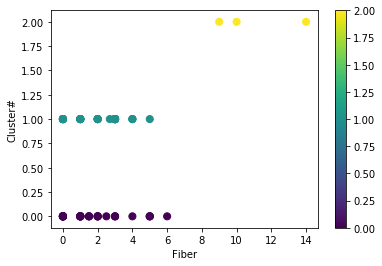

In [13]:
import matplotlib.pyplot as plt
import numpy as np
#'calories','fat','sodium','carbo','sugars','potass','vitamins','shelf','weight','cups','rating'
plt.scatter( X['fiber'],y_kmeans,c=y_kmeans, s=50)
plt.colorbar()
#plt.title('Scatter plot between Fiber and Rating')
plt.xlabel('Fiber')
plt.ylabel('Cluster#')
plt.show()

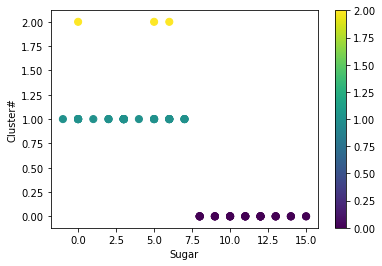

In [14]:
plt.scatter( X['sugars'],y_kmeans,c=y_kmeans, s=50)
plt.colorbar()
#plt.title('Scatter plot between sugars and Rating')
plt.xlabel('Sugar')
plt.ylabel('Cluster#')
plt.show()

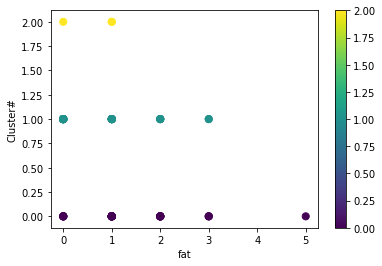

In [15]:
plt.scatter( X['fat'],y_kmeans,c=y_kmeans, s=50)
plt.colorbar()
#plt.title('Scatter plot between sugars and Rating')
plt.xlabel('fat')
plt.ylabel('Cluster#')
plt.show()

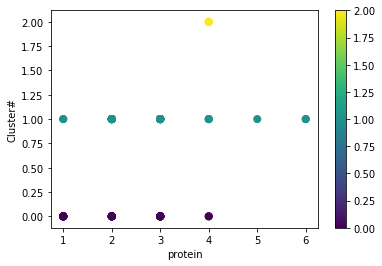

In [16]:
plt.scatter( X['protein'],y_kmeans,c=y_kmeans, s=50)
plt.colorbar()
#plt.title('Scatter plot between protein and #cluster')
plt.xlabel('protein')
plt.ylabel('Cluster#')
plt.show()

In [137]:
#X.insert(0,'Name',cereal['name'])
#X.insert(1,'Manufacturer',cereal['mfr'])
cereal['Cluster']=y_kmeans
Healthy=cereal.loc[X['cluster']==2]
Healthy.sort_values(by='fiber',ascending=False)
#Asuuming values with low sugar,low fat,high fiber,cluster 2 comes out to be most healthy 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Cluster
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,2
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,2
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,2


In [139]:
Healthy=cereal.loc[X['cluster']==1]
Healthy.sort_values(by='sugars')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Cluster
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.00,0.67,50.828392,1
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,1
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,1
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645,1
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816,1
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112,1
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,1
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25,50.764999,1
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324,1
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837,1
